<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:7- VARMA </center></h1></u>

Hello everyone!! Welcome back to the 7th Assignment of the time series module.

![](https://c.tenor.com/6TKrKIBuOYkAAAAC/welcome.gif)

In this assignment you will be learning about VARMA and implementation of VARMA model.
<h2><u>Table of Contents:</h2></u>

1. VARMA<br>
2. Implementing VARMA Model<br>

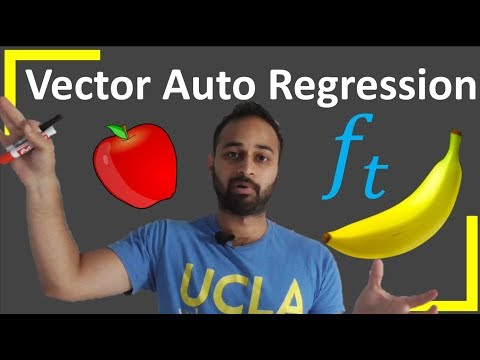

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('UQQHSbeIaB0', width=700, height=400)

<h2><u>VARMA</h2></u>

When it comes to multivariate time series modelling, we can utilise a variety of models such as VAR, VMA, and VARMA. The Vector Auto-Regressive (VAR) model is a generalisation of the auto-regressive model for multivariate time series in which the time series is stationary and only the lag order 'p' is taken into account in the modelling. The Vector Moving Average (VMA) model is a version of the Moving Average Model for multivariate time series where the time series is stationary and only the moving average order 'q' is included in the model.

![](https://miro.medium.com/max/1200/1*4-89MN2cai_4vYbG5lR2hQ.png)

The Vector Autoregressive Moving Average (VARMA) model is a hybrid of the VAR and VMA models that aids in multivariate time series modelling by taking into account both lag order and moving average order (p and q). By setting the q parameter to 0, we can make a VARMA model behave like a VAR model, and by setting the p parameter to 0, we can make it behave like a VMA model.

<br>
<h4><u>Multivariate time series</h4></u>

Time series having many input features as predictors.

![](https://miro.medium.com/max/1400/1*LfUNeGQPNWpnEOYEbiRlmw.png)

<h2><u>Implementing VARMA Model</h2></u>

We have the VARMA model, which has two parameters, p and q; however, if we stick to the simple model, identifying the ideal combination of parameters for improved model performance will be difficult. In these cases, we can try a model from which we can easily obtain the combination of p and q parameters, and instead of wasting time iterating with random parameters, we can fit them into the VARMA model and improve the model's performance in less time. So, using Auto-ARIMA, we strive to determine the best-fit combination of parameters, which we then utilise in the VARMA model to predict predicted values.

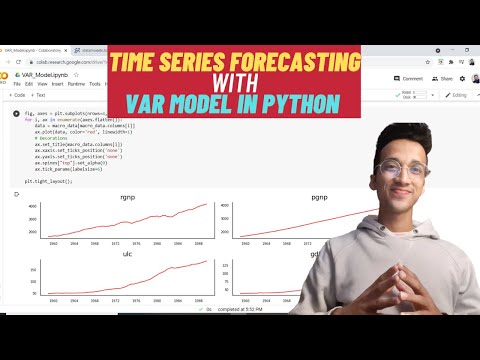

In [2]:
YouTubeVideo('4jv1NGlAc_0', width=700, height=400)

Lets start by importing the necessary libraries.

* pandas: for storing and analyzing data
* matplotlib: for plotting graphs and visualizations
* VARMAX: to implement VARMA
* numpy: for array and matrix operations
* adfuller: for implementing ADF test for stationarity
* default_timer: Measure execution time of small code snippets, https://docs.python.org/3/library/timeit.html
* warnings: to manipulate warnings in code execution

In [7]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.6 MB/s eta 0:00:00


In [8]:
#import above mentioned libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from timeit import default_timer as timer
import warnings
#filter warnings to ignore them warnings.filterwarnings("ignore")
#%matplotlib inline
%matplotlib inline


The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [9]:
# import drive from google.colab
import google.colab.drive as drive

# mount the drive
mount = drive.mount('/content/drive')


Mounted at /content/drive


Start by reading and loading the data. Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1nd46jK9RscOeHbcN-5NJdarRB5ga6ChM/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has 7 columns. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html.

In [10]:
#read the data
data=pd.read_csv('/content/datatest.csv')

#print the first 5 rows
data.head()


,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1.0
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1.0
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1.0
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1.0
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1.0


Next apply the to_datetime function to the Date column of the dataset. Pandas to_datetime() method helps to convert string Date time into Python Date time object. https://www.geeksforgeeks.org/python-pandas-to_datetime/

In [11]:
#convert dates to datetime
data['Date'] = pd.to_datetime(data['Date'])


Check the data information using info() function. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [12]:
#check the data information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           795 non-null    datetime64[ns]
 1   Temperature    795 non-null    float64       
 2   Humidity       795 non-null    float64       
 3   Light          795 non-null    float64       
 4   CO2            795 non-null    float64       
 5   HumidityRatio  795 non-null    float64       
 6   Occupancy      795 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 64.6 KB


Now lets check the number of NAN values in the data. For that we will use isnull() method and then apply the sum() method.

In [13]:
#check NAN values in data
data.isnull().sum()


,0
Date,384
Temperature,384
Humidity,384
Light,384
CO2,384
HumidityRatio,384
Occupancy,384


It is observed that 384 NAN values are present in each column. Hence eliminate these values using the dropna() method.

In [14]:
#eliminate NAN values
data.dropna(inplace=True)


Again check the number of NAN values.

In [15]:
#check NAN values
data.isnull().sum()


,0
Date,0
Temperature,0
Humidity,0
Light,0
CO2,0
HumidityRatio,0
Occupancy,0


![](https://c.tenor.com/EJAyEmA1ygQAAAAM/charlie-brown-snoopy.gif)

Hurrayyyy!! You have removed all the NAN values.
Lets proceed further.


<br>

The next step is to perform the ADF test for stationarity. For that you need to create a function so that you can use it multiple times for all the columns(6 columns). Apply the adfuller function to each column and set autolag to 'AIC'. Convert the results of the adf test into a pandas series using the pd.Series function. Keep indexes as index=['Test Statistic','p-value','No Lags Used','Number of Observations Used']. Now print the critical values by iterating thorugh 5th column of results. Next print the entire output of the test. Ahead check for the p value and decide whether to accept or reject the null hypothesis.

In [16]:
#create the adf test function,take the column and column name as parameters
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    #print (f'Results of Dickey-Fuller Test for column: {column_name}')
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    #apply the adfuller function to the column
    dftest = adfuller(series, autolag='AIC')
    #convert the test output to pandas series
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    #iterate through number of observations used.'for key,value in dftest[4].items():
    for key,value in dftest[4].items():
       #print the critical values        dfoutput['Critical Value (%s)'%key] = value
    #print the test output
      print (dfoutput)
    #check if p value is less than equal to 0.05
    if dftest[1] <= 0.05:
        #print("Conclusion:")
        print("Conclusion:")
        #print("Reject the null hypothesis")
        print("Reject the null hypothesis")
        #print("Data is stationary")         print("Data is stationary")
    #else:
    else:
        #print("Conclusion:")
        print("Conclusion:")
        #print("Fail to reject the null hypothesis")
        print("Fail to reject the null hypothesis")
        #print("series is non-stationary")
        print("series is non-stationary")


In [ ]:
#create the adf test function,take the column and column name as parameters

    #apply the adfuller function to the column

    #print (f'Results of Dickey-Fuller Test for column: {column_name}')

    #apply the adfuller function to the column

    #convert the test output to pandas series

    #iterate through number of observations used.'for key,value in dftest[4].items():

       #print the critical values

    #print the test output

    #check if p value is less than equal to 0.05

        #print("Conclusion:")

        #print("Reject the null hypothesis")

        #print("Data is stationary")

    #else:

        #print("Conclusion:")

        #print("Fail to reject the null hypothesis")

        #print("series is non-stationary")


Once you have created the adf test function, apply this function to every column of the dataset excluding the date column. Do this by running a for loop. Check for the result of ADF test for each column.

In [17]:
#iterate through column names
for name in data.columns[1:]:
    #apply the adf test function
    Augmented_Dickey_Fuller_Test_func(data[name],name)

    #apply adf test function


Results of Dickey-Fuller Test for column: Temperature
Test Statistic                  -4.924564
p-value                          0.000031
No Lags Used                     2.000000
Number of Observations Used    792.000000
dtype: float64
Test Statistic                  -4.924564
p-value                          0.000031
No Lags Used                     2.000000
Number of Observations Used    792.000000
dtype: float64
Test Statistic                  -4.924564
p-value                          0.000031
No Lags Used                     2.000000
Number of Observations Used    792.000000
dtype: float64
Conclusion:
Reject the null hypothesis
Results of Dickey-Fuller Test for column: Humidity
Test Statistic                  -1.880754
p-value                          0.341168
No Lags Used                    21.000000
Number of Observations Used    773.000000
dtype: float64
Test Statistic                  -1.880754
p-value                          0.341168
No Lags Used                    21.00000

As observed, the adf test for each and every column of the data has failed to reject the null hypothesis. This proves that all the columns are non stationary. Hence it is required to convert all the series into stationary series. Before doing so, split the data into training and testing data. Use last 30 rows as testing data. Exclude the date column while doing so.

In [18]:
#seperate the columns excluding data in another variable
df=data.iloc[:,1:]

#split the data
train=df.iloc[:-30]
test=df.iloc[-30:]


Now differentiate the training data using the diff() function for making the data stationary and drop the NAN values if any.

In [20]:
#differentiate
train_diff=train.diff().dropna()

#drop nan values
#drop = train_diff.dropna()
train_diff.dropna(inplace = True)


Again run the ADF test for all the columns to check whether stationarity has been removed after single differentiation or not.

In [22]:
#iterate through column names
for name in train_diff.columns:
    #apply the adf test function
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)



Results of Dickey-Fuller Test for column: Temperature
Test Statistic                -5.682122e+00
p-value                        8.439292e-07
No Lags Used                   1.200000e+01
Number of Observations Used    7.510000e+02
dtype: float64
Test Statistic                -5.682122e+00
p-value                        8.439292e-07
No Lags Used                   1.200000e+01
Number of Observations Used    7.510000e+02
dtype: float64
Test Statistic                -5.682122e+00
p-value                        8.439292e-07
No Lags Used                   1.200000e+01
Number of Observations Used    7.510000e+02
dtype: float64
Conclusion:
Reject the null hypothesis
Results of Dickey-Fuller Test for column: Humidity
Test Statistic                -8.732926e+00
p-value                        3.155889e-14
No Lags Used                   5.000000e+00
Number of Observations Used    7.580000e+02
dtype: float64
Test Statistic                -8.732926e+00
p-value                        3.155889e-14
No L

Hence the null hypothesis is rejected in case of every column which proves that all the columns are now stationary.<br><br>

Next, we must understand the correlation between the time series in our time series so that we can model more precisely by understanding how time series interact with one another. Johansen’s test is a way to determine if three or more time series are cointegrated. If (X,Y,Z) are each integrated of order d, and there exist coefficients a,b,c such that aX + bY + cZ is integrated of order less than d, then X, Y, and Z are cointegrated. Johansen's test can be divided into two types: one that uses trace (from linear algebra) and the other that uses the maximum eigenvalue technique. If cointegration is present, both forms of the test will show it. For both types of tests, the null hypothesis is that no cointegrating equations exist. The distinction is in the alternative hypothesis: the trace test alternate hypothesis merely states that there are at least one cointegrating relationship (shown by the number of linear combinations). The alternative hypothesis for the maximum eigenvalue test is K0 + 1 (rather than K > K0). In this case, rejecting the null hypothesis means claiming that there is only one combination of non-stationary variables that results in a stationary process.

### Refer the video given below

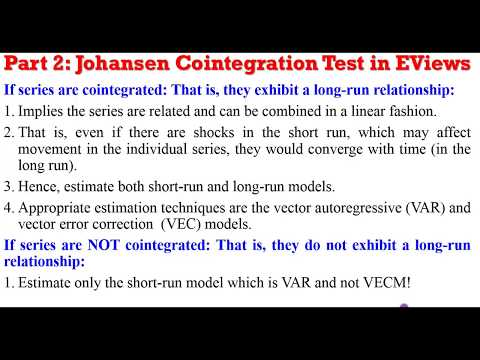

In [23]:
YouTubeVideo('TB4m9M1sIJ0', width=700, height=400)

Start by importing coint_johansen. from statsmodels.tsa.vector_ar.vecm import coint_johansen. Define a function by passing the dataframe. Apply the coint_johansen function by passing the dataframe, det_order as -1(Number of deterministic terms) and k_ar_diff as 5(Number of lagged differences in the model.) Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.vecm.coint_johansen.html. Create a dictionary d = {'0.90':0, '0.95':1, '0.99':2}. Extract the traces from result using lr1 method and extract the critical values of 95% column from the result using cvt method. Print the traces and critical values.

In [24]:
#import coint_johansen from statsmodels.tsa.vector_ar.vecm
from statsmodels.tsa.vector_ar.vecm import coint_johansen

#define the function
def cointegration_test(df, det_order, k_ar_diff):
    #apply coint_johansen function
    model = coint_johansen(df, det_order, k_ar_diff)


    #pass the parameter(df,-1,5) in coint_johansen and store into one variable
    res = coint_johansen(df,-1,5)

    #d = {'0.90':0, '0.95':1, '0.99':2}
    d = {'0.90':0, '0.95':1, '0.99':2}

    #traces = res.lr1
    traces = res.lr1

    #cvts = res.cvt[:, d[str(1-0.05)]]
    cvts = res.cvt[:, d[str(1-0.05)]]

    #print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)

    #iterate through the columns
    for col, trace, cvt in zip(df.columns, traces, cvts):

    #def adjust(val, length= 6):
     def adjust(val, length= 6):
        return str(val).ljust(length)

        #return str(val).ljust(length)\
        return str(val).ljust(length)

    #print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)

    #iterate through the columns
    for col, trace, cvt in zip(df.columns, traces, cvts):




       #print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
       print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


Hence the function is defined. Its time to apply this function to the columns of our data.

In [25]:
#apply cointegration_test function
cointegration_test(train_diff,0,5)


Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Temperature >  651.57    > 83.9383   =>   True
Humidity >  472.39    > 60.0627   =>   True
Light  >  336.08    > 40.1749   =>   True
CO2    >  224.97    > 24.2761   =>   True
HumidityRatio >  135.24    > 12.3212   =>   True
Occupancy >  57.49     > 4.1296    =>   True


Hence the test statistic for all the columns is greater than the 95% critical value. Therefor we reject the null hypothesis as there exists cointegration equations in the columns.

Install pmdarima in order to use auto arima. use the pip install command to do so.

In [26]:
#installing pmdarima using pip
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 92.7 MB/s eta 0:00:00


Import auto arima from pmdarima. We will use auto arima to find the optimum values of p and q for each column. Then we will use the best p,q for which the model gives lowest AIC,BIC for forecasting the series.

In [29]:
!pip install --upgrade pmdarima --no-cache-dir --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 286.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 279.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 382.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 269.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 302.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 256.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 288.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 265.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 370.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [30]:
#import auto_arima from pmdarima
from pmdarima.arima import auto_arima


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Next you have to apply the auto_arima function to each column. Do it same as done in the previous assignment of Auto_ARIMA.

In [31]:
#initialize a list for storing p,d,q values
pqr_list=[]

#iterate through names of columns
for name in train_diff.columns:
    #print(f'Searching order of p and q for : {name}')
    print(f'Searching order of p and q for : {name}')
    #apply auto_arima
    stepwise_model = auto_arima(train_diff[name],start_p=1,
                                start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True,
         stepwise=True,maxiter=1000)
    #get the order
    parameter = stepwise_model.get_params().get('order')
    #parameter = stepwise_model.get_params().get('order')

    #print(f'optimal order for:{name} is: {parameter} \n\n')
    print(f'optimal order for:{name} is: {parameter} \n\n')

    #append the p,d,q in the defined list
    pqr_list.append(parameter)


Searching order of p and q for : Temperature


NameError: name 'auto_arima' is not defined

Next we define a inverse_diff function that has parameters like the actual dataframe and predicted dataframe. This function will create a dataframe such that it contains the original data and also cumulative sum of predicted data.


In [32]:
#define the inverse_diff function
def inverse_diff(actual_df,pred_df):
    #create a copy of the actual data in another variable
    df_res=actual_df.copy()
    #extract the columns from actual data
    cols=actual_df.columns
    #iterate through extracted columns
    for col in cols:

        #df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()

    #return the new dataframe
    return df_res


Now we have to apply VARMAX to the data using all the values of p,q to select the best p,q based on lowest AIC,BIC. Start by creating a dictionary for storing the fitted values and corresponding orders as keys. Iterate through values of p,q stored in the list applying enumerate method to the list of orders.Enumerate arranges elements in a sequence having indexes. Refer:https://www.geeksforgeeks.org/enumerate-in-python/.  Use the try and except blocks to overrule any errors. Refer: https://www.geeksforgeeks.org/python-try-except/. Apply the VARMAX function to differentiated training data. Pass p and q as orders. Append the fitted values in the dictionary and corresponding orders as keys. Plot the original data and predicted data. And also print the AIC and BIC as done before in auto arima.

In [40]:
#set the figure size
plt.figure(figsize=(15,15))
#create a dict
fitted_model_dict={}
pq = pqr_list  # This line is added to fix the NameError
for idx,orders in enumerate(pq):
#start try block
  try:
    #create VARMAX model
    model = VARMAX(train_diff, order=(orders[0],orders[2]))
    #fit the model 'model.fit()'
    model_fit = model.fit()
    #add the fitted values in the dictionary,keep key as tuple of orders
    fitted_model_dict[orders] = model_fit
    #create subplots
    #plt.subplot(6,1,idx+1)
    plt.subplot(6,1,idx+1)
    #plot the original series
    plt.plot(train_diff)
    #plot the fitted values 'model_fit.fittedvalues'
    plt.plot(model_fit.fittedvalues)
    #set title     plt.title("p,q={}".format(orders),fontsize=16)
    plt.show()
    #print AIC 'fitted_model_dict[values].aic'
    print('AIC for AR({0}),MA({1}): {2}'.format(orders[0],orders[2],fitted_model_dict[orders].aic))     #print BIC 'fitted_model_dict[values].bic'
    print('BIC for AR({0}),MA({1}): {2}'.format(orders[0],orders[2],fitted_model_dict[orders].bic))
  #start except block
  except:
    #pass the execution
    pass
    plt.tight_layout()
    plt.show()



<Figure size 1500x1500 with 0 Axes>

As observed, choose the AIC and BIC with lowest values. Model AR(2),MA(1) gives lowest AIC BIC values. Hence they can be chosen as the optimum p and q values. By using p and q values as 2 and 1, fit the VARMAX model to the data. Forecast the series for next 30 days using the forecast method.

In [41]:
# fit model using p=2,q=1
model = VARMAX(train_diff[['Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio','Occupancy']],                order=(2,1)).fit( disp=False)
#forecast for 30 steps. result = model.forecast(steps = 30)
result = model.forecast(steps = 30)


#forecast for 30 steps.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/scipy/linalg/_solvers.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.15562e-21): result may not be accurate.
  solve_lyapunov = solve_continuous_lyapunov
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/

Now apply the inverse_diff function you created before. Pass the differentiated training data and the forecasted results in the function.

In [42]:
#apply inverse_diff
df_res=inverse_diff(train_diff,result)


Lets check the first 5 rows of the result.

In [43]:
#use head method
df_res.head()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Temperature_1st_inv_diff,Humidity_1st_inv_diff,Light_1st_inv_diff,CO2_1st_inv_diff,HumidityRatio_1st_inv_diff,Occupancy_1st_inv_diff
1,0.0180,0.018,-6.800000,11.200000,0.000008,0.0,0.0180,0.004667,-6.800000,9.333333,6.503000e-06,0.0
2,0.0120,-0.060,-5.733333,9.266667,-0.000008,0.0,0.0300,-0.055333,-12.533333,18.600000,-1.005000e-06,0.0
3,-0.0075,-0.105,-78.916667,5.083333,-0.000021,0.0,0.0225,-0.160333,-91.450000,23.683333,-2.238500e-05,0.0
4,0.0315,0.075,-5.150000,4.250000,0.000023,0.0,0.0540,-0.085333,-96.600000,27.933333,4.360000e-07,0.0
5,0.0060,0.060,80.066667,11.000000,0.000013,0.0,0.0600,-0.025333,-16.533333,38.933333,1.317400e-05,0.0


After getting the result, lets visualize the results.

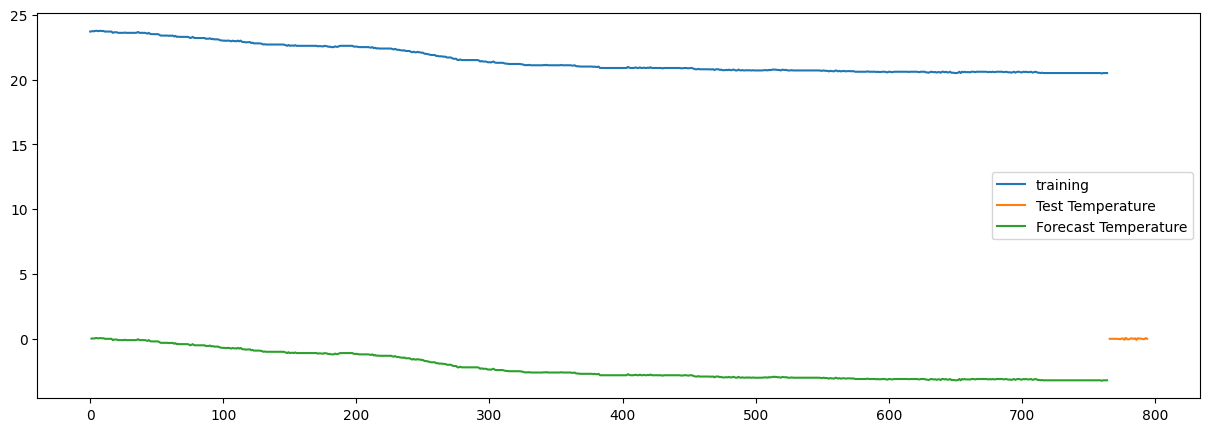

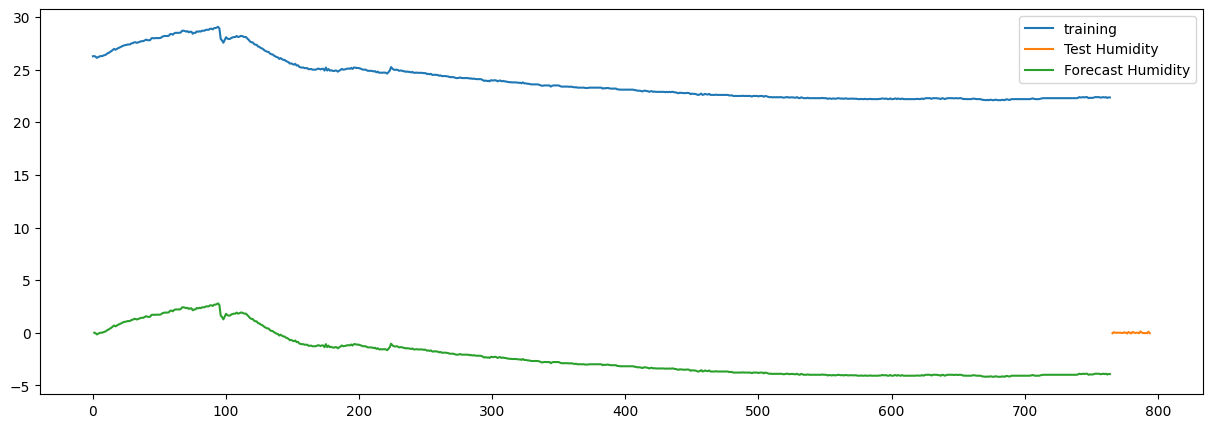

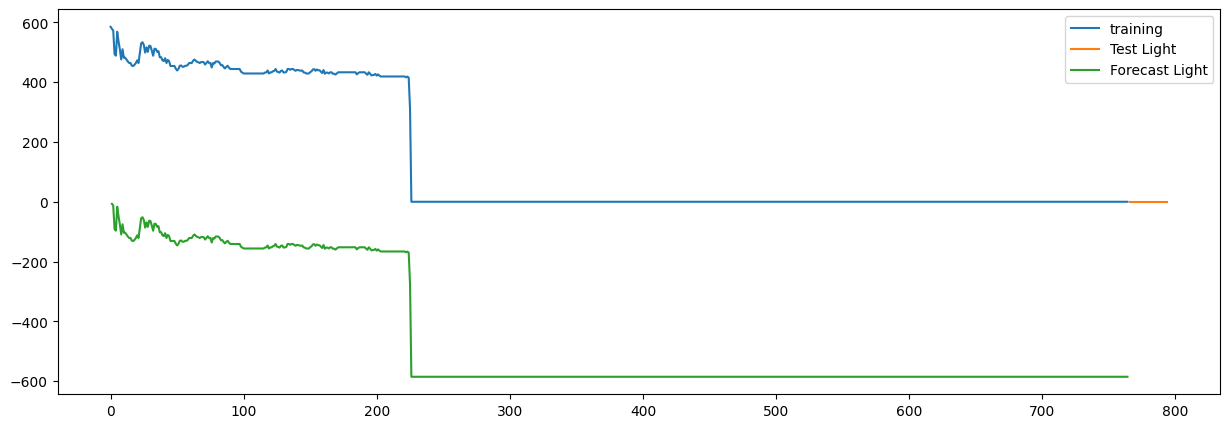

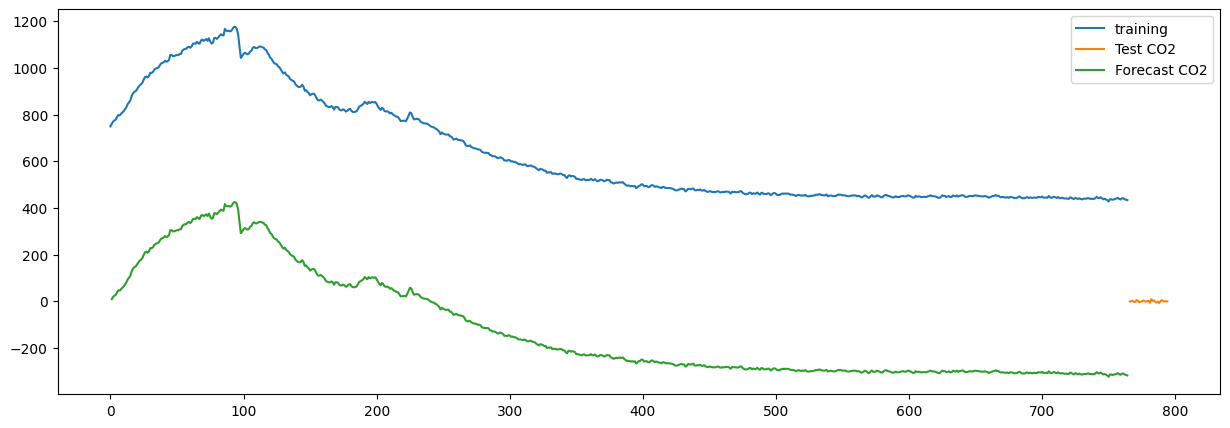

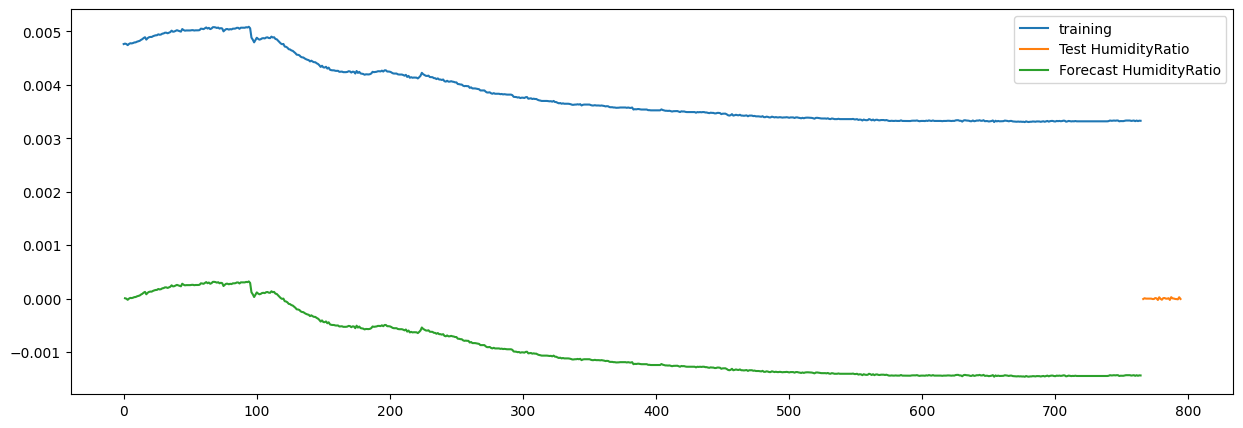

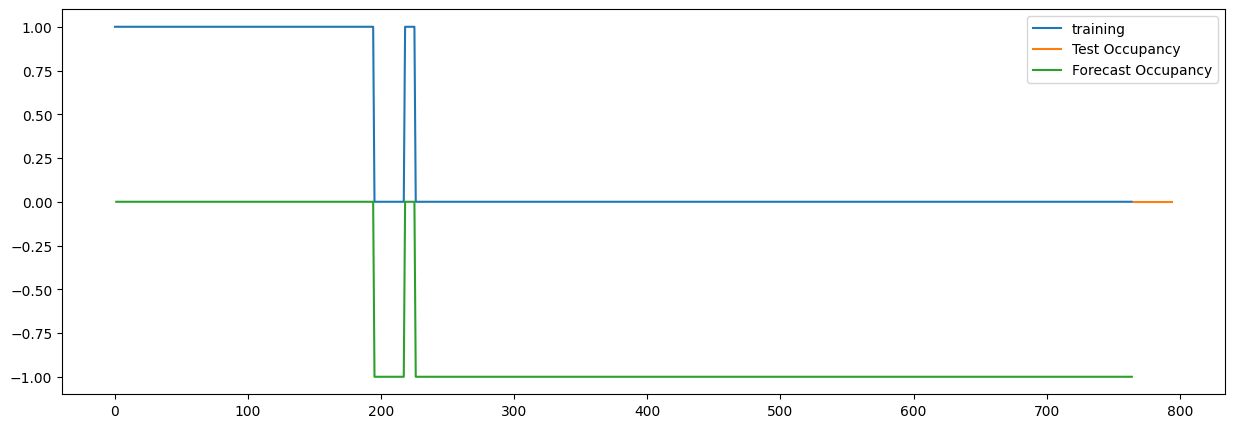

In [44]:
#iterate through names of columns
for i in ['Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio','Occupancy']:

    #set figure size
    plt.figure(figsize=(15,5))

    #plot training data
    plt.plot(train[i],label='training')

    #plot test data
    plt.plot(test[str(i)].diff(), label='Test '+str(i))

    #plot result
    plt.plot(df_res[str(i)+'_1st_inv_diff'], label='Forecast '+str(i))

    #set legend and show
    plt.legend()
    plt.show()


WOOHHOOO!!! You've done it. Do try VARMA with many other datasets.

In this assignment you learned:

* VARMA
* Implementing VARMA with Auto ARIMA


Keep practising until next assignment comes in. <br><br>

## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br> See you then!!

![](https://t3.ftcdn.net/jpg/03/31/00/42/360_F_331004239_KWUmxaZheB8At78mnPprGmLlCPqAgDwr.jpg)